# Predicting Interstate Traffic in the US using Machine Learning 

Traffic congestion is a widespread problem impacting individuals and transportation systems around the globe. It's essential to accurately predict traffic volume for effective traffic management, urban planning, and infrastructure growth. 

In this project, we'll aim to develop a machine learning model that can forecast highway traffic volume based on various factors such as date and time, weather conditions, temperature, etc. 



## Data 
> The original data came from: https://www.kaggle.com/datasets/anshtanwar/metro-interstate-traffic-volume/data

This dataset contains hourly records of the traffic volume for westbound I-94 highway. Each feature includes relevant information that may influence traffic flow. 

### Key features 

1. holiday: a categorical variable that indicates whether the date is a US national holiday or a regional holiday (such as the Minnesota State Fair).
2. temp: a numeric variable that shows the average temperature in kelvin.
3. rain_1h: a numeric variable that shows the amount of rain in mm that occurred in the hour.
4. snow_1h: a numeric variable that shows the amount of snow in mm that occurred in the hour.
5. clouds_all: a numeric variable that shows the percentage of cloud cover.
6. weather_main: a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
7. weather_description: a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
8. date_time: a datetime variable that shows the hour of the data collected in local CST time.
9. traffic_volume: a numeric variable that shows the hourly I-94 reported westbound traffic volume.

# Preparing the tools 

In [103]:
# Import all the tools we need 

# Regular EDA and plotting libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# We want our plots to appear inside the notebook 
%matplotlib inline 

import warnings 
warnings.filterwarnings('ignore')

# Models
from sklearn.preprocessing import MinMaxScaler 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

# Models Evaluations 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Save the model 
import joblib

# Load the data

In [104]:
df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
df

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,5545,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,02-10-2012 09:00
1,4516,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,02-10-2012 10:00
2,4767,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00
3,5026,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00
4,4918,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00
...,...,...,...,...,...,...,...,...,...
48199,3543,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,30-09-2018 19:00
48200,2781,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,30-09-2018 20:00
48201,2159,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,30-09-2018 21:00
48202,1450,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,30-09-2018 22:00


# Exploratory Data Analysis  

In this section we are going to explore the data, look for any missing information, conduct statistical analysis, and create visualizations. This is going to help us get a sense of how the data is structured, identify any patterns or trends, and understand how different variables relate to each other. 

In [105]:
df.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,5545,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,02-10-2012 09:00
1,4516,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,02-10-2012 10:00
2,4767,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00
3,5026,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00
4,4918,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00


In [106]:
df.tail()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
48199,3543,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,30-09-2018 19:00
48200,2781,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,30-09-2018 20:00
48201,2159,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,30-09-2018 21:00
48202,1450,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,30-09-2018 22:00
48203,954,NaN,282.12,0.0,0.0,90,Clouds,overcast clouds,30-09-2018 23:00


In [107]:
# Display the data types of each column 
print(df.dtypes)

traffic_volume           int64
holiday                 object
temp                   float64
rain_1h                float64
snow_1h                float64
clouds_all               int64
weather_main            object
weather_description     object
date_time               object
dtype: object


In [108]:
# Statistical analysis 
df.describe()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,3259.818355,281.205870,0.334264,0.000222,49.362231
std,1986.860670,13.338232,44.789133,0.008168,39.015750
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1193.000000,272.160000,0.000000,0.000000,1.000000
50%,3380.000000,282.450000,0.000000,0.000000,64.000000
75%,4933.000000,291.806000,0.000000,0.000000,90.000000
max,7280.000000,310.070000,9831.300000,0.510000,100.000000


In [109]:
# Check for missing values
missing_values = df.isnull().sum()
print(f"Missing values in each column:\n{missing_values}")

Missing values in each column:
traffic_volume             0
holiday                48143
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
date_time                  0
dtype: int64


In [110]:
# Replace the NaN values, in the holiday column to a different value 
df.fillna('Non Holiday', inplace= True)

## Data Visualization 

#### Traffic Volume Distribution

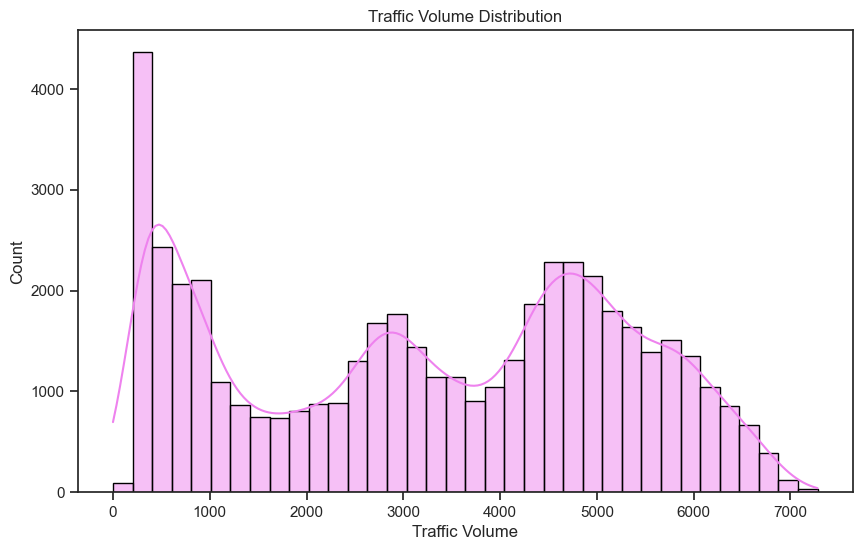

In [111]:
# Set the style of seaborn plot
sns.set(style="ticks")

# Plotting the distribution of traffic_volume
plt.figure(figsize=(10,6))
sns.histplot(df["traffic_volume"], color="violet", kde=True, edgecolor="black")
plt.title("Traffic Volume Distribution")
plt.xlabel("Traffic Volume")
plt.ylabel("Count");


* The histogram presents two prominent peaks: the first that is near 0, might mean nighttime or early morning hours when there's no much traffic. The other peak that is near 4500-5000, might represent rush hour traffic. 

#### Hourly Average Traffic Volume 

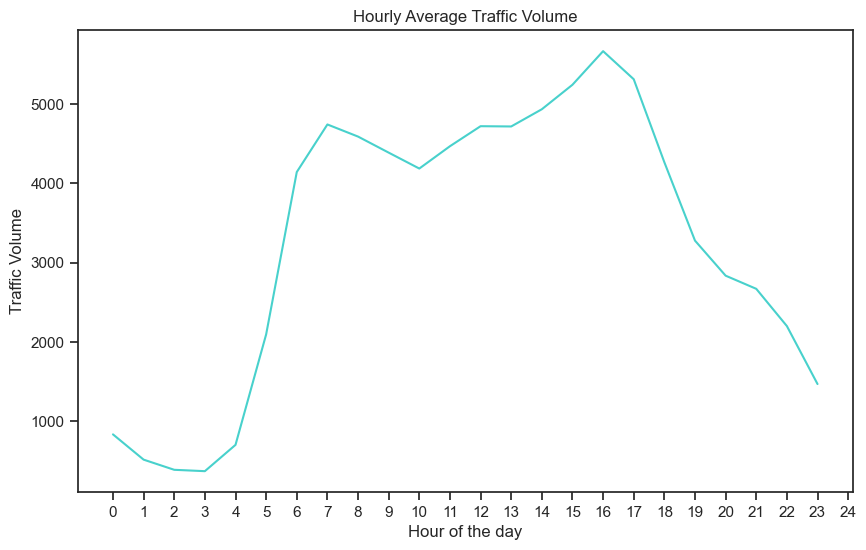

In [112]:
# Convert the "date_time" column to datetime format 
df['date_time'] = pd.to_datetime(df['date_time'], dayfirst=True)

# Extract hour from the "date_time" column 
df["hour"] = df['date_time'].dt.hour

# Group by hour and calculate the mean traffic volume for each column 
hourly_traffic = df.groupby("hour")["traffic_volume"].mean()

# Create a plot 
fig = hourly_traffic.plot(figsize=(10,6), color=["mediumturquoise"])

#Add labels and legend 
plt.title("Hourly Average Traffic Volume")
plt.xlabel("Hour of the day")
plt.xticks(range(0,25))
plt.ylabel("Traffic Volume");

The graph illustrates cyclical patterns of human activity and daily routines: 

* During the night and early morning hours, the line on the graph remains relatively low, indicading a period of decreased activity. This period most likely corresponds to late-night hours when most people are inactive. 

* As the morning progresses, there's a noticeable increase in the traffic volume, peaking between 7:00 am to 8:00 am. This peak suggests a surge in activity, possibly corresponds to people moving to work or school. 

* The traffic stays almost at the same levels after the morning peak before another significant peak that emerges in the afternoon, starting aroun 4:00pm and extending until approximately 6:00pm. This peak likely corresponds to the evening rush hours, as individuals begin to return home from work or school. 

#### Daily Average Traffic Volume 

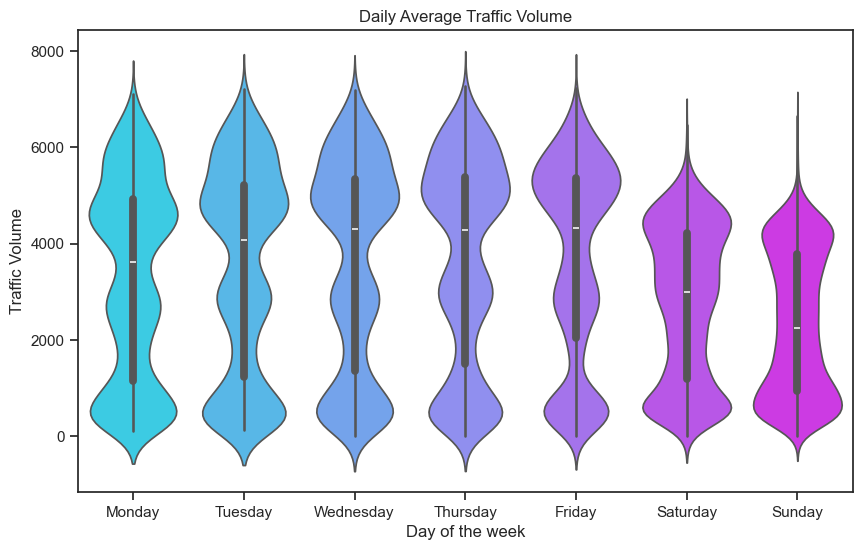

In [113]:
# Extract the day of the week from the "date_time" column
df["day_of_week"] = df["date_time"].dt.day_name()

# Define the name for the days of the week 
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", 
            "Saturday", "Sunday"]

# Group by day of the week and calculate the mean traffic volume for each day 
daily_traffic = df.groupby("day_of_week")["traffic_volume"].mean().reindex(days)

# Create a plot 
plt.figure(figsize=(10, 6))
sns.violinplot(x="day_of_week", y="traffic_volume", data=df, order=days, palette="cool")

#Add labels and legend 
plt.title("Daily Average Traffic Volume")
plt.xlabel("Day of the week")
plt.ylabel("Traffic Volume");

* On weekdays, the traffic volume remains relatively consistent throughout the week. However, there is a slight increase on Fridays compared to the other week days. This likely corresponds to activity associated with the end of the workweek. 

* Traffic volumes decreases during weekends, especially on Sundays. 

#### Monthly Average Traffic Volume 

Text(0, 0.5, 'Traffic Volume')

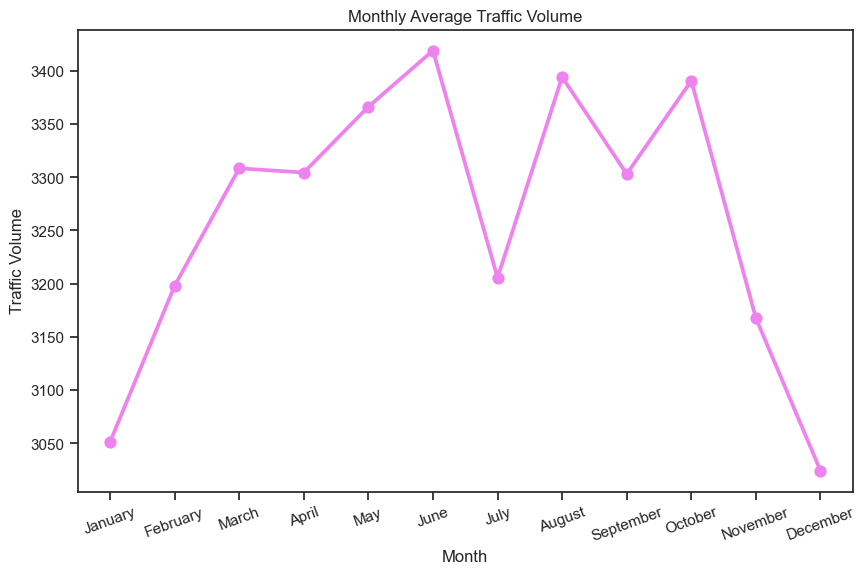

In [114]:
# Extract the month from the "date_time" column
df["month"] = df["date_time"].dt.month

# Define the names of the months
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Group by month and calculate the mean traffic volume for month 
monthly_traffic = df.groupby("month")["traffic_volume"].mean()

# Create a point plot
plt.figure(figsize=(10, 6))
sns.pointplot(x="month", y="traffic_volume", data=df, color="violet", ci=None)

# Add labels and title
plt.title("Monthly Average Traffic Volume")
plt.xlabel("Month")
plt.xticks(range(0, 12), months, rotation=20)
plt.ylabel("Traffic Volume")

* There is noticeable decline in the traffic volume during summer and winter dates, indicating reduced activity during these seasons. This can be influenced by factors such as vacations, holidays, and adverse weather conditions. 

#### Holidays Impact on Traffic Volume 

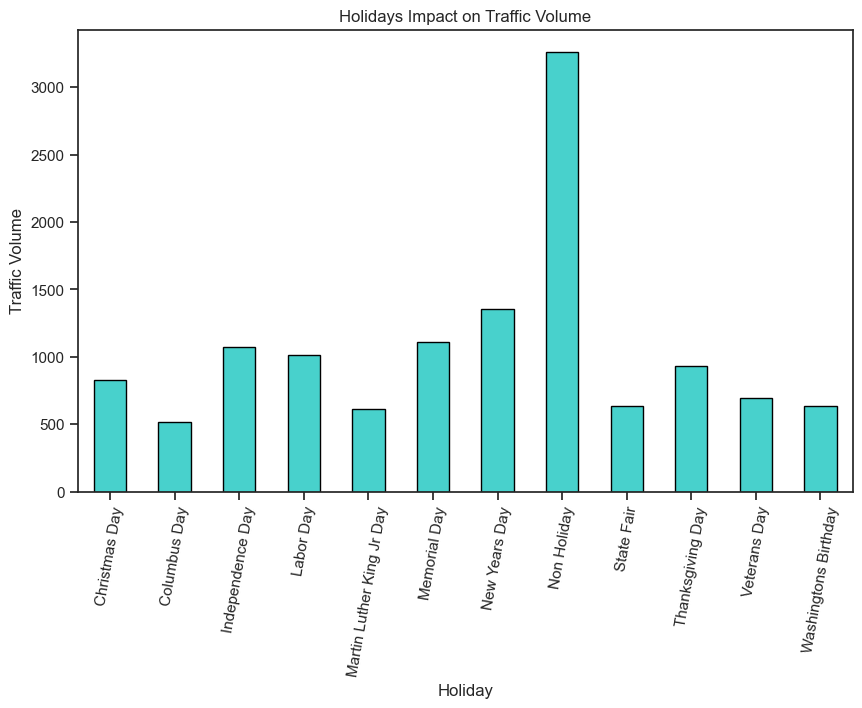

In [115]:
# Group by holiday and calculate the mean traffic volume  
holiday_traffic = df.groupby("holiday")["traffic_volume"].mean()

# Create a plot 
fig = holiday_traffic.plot(kind="bar", figsize=(10,6), color="mediumturquoise", edgecolor="black")

#Add labels and legend 
plt.title("Holidays Impact on Traffic Volume")
plt.xlabel("Holiday")
plt.xticks(rotation=80)
plt.ylabel("Traffic Volume");

* The traffic is lower on holidays, this can be due to the combination of reduced commuting, business closures, public transportation adjustments, school closures, and alternative holiday activities. 

#### Weather Conditions Impact on Traffic Volume

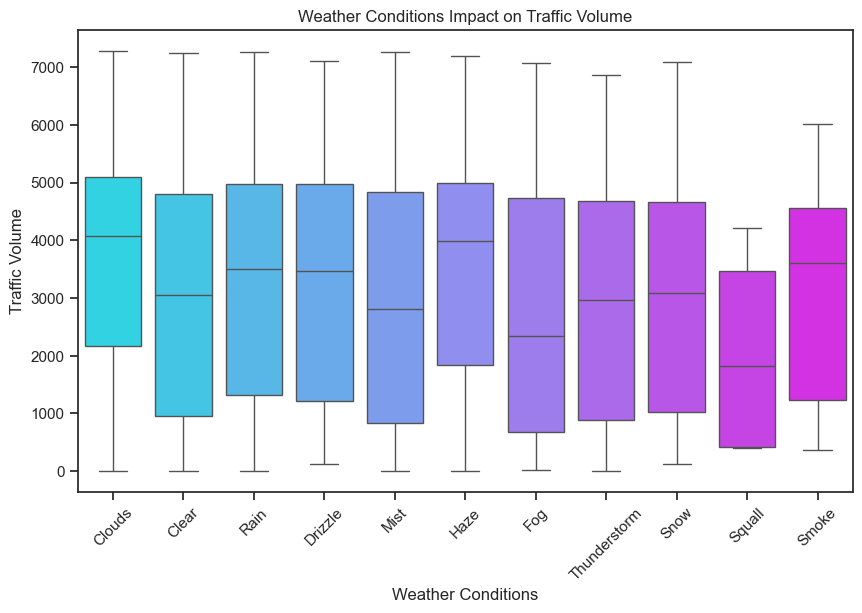

In [116]:
# Group by weather_main and calculate the mean traffic volume  
weather_condition = df.groupby("weather_main")["traffic_volume"].mean()

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='weather_main', y='traffic_volume', data=df, palette="cool")

# Add labels and title
plt.title("Weather Conditions Impact on Traffic Volume")
plt.xlabel("Weather Conditions")
plt.ylabel("Traffic Volume")
plt.xticks(rotation=45);

* We can see that weather conditions characterized by 'Clouds,' 'Haze,' 'Rain,' and 'Smoke' correlate with elevated levels of traffic volume. 

# Feature Engineering

In this section, we are going to prepare our data for modeling. We need to convert the categorical variables into numerical variables,  split the dataset and apply feature scaling.

#### Feature extraction

* First we are going to extract the year of the "date_time" column 
* Then we are going to drop the "date_time" column since it's not going to be needed for the modeling section

In [117]:
df.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,hour,day_of_week,month
0,5545,Non Holiday,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,9,Tuesday,10
1,4516,Non Holiday,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,10,Tuesday,10
2,4767,Non Holiday,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,11,Tuesday,10
3,5026,Non Holiday,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,12,Tuesday,10
4,4918,Non Holiday,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,13,Tuesday,10


In [118]:
# Datetime extraction: we are going to extract the year and drop the "date_time" column

df["year"] = df["date_time"].dt.year
df.drop('date_time', axis=1, inplace=True)

#### Encoding 

We are going to convert categorical variables into numerical variables.

In [119]:
le = LabelEncoder()
cat_columns = ['holiday', 'weather_main', 'weather_description', 'day_of_week']

for col in cat_columns:
    df[col] = le.fit_transform(df[col])

In [120]:
df.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,hour,day_of_week,month,year
0,5545,7,288.28,0.0,0.0,40,1,24,9,5,10,2012
1,4516,7,289.36,0.0,0.0,75,1,2,10,5,10,2012
2,4767,7,289.58,0.0,0.0,90,1,19,11,5,10,2012
3,5026,7,290.13,0.0,0.0,90,1,19,12,5,10,2012
4,4918,7,291.14,0.0,0.0,75,1,2,13,5,10,2012


#### Standardization

* We do this so our data is more suitable and to make sure that all the features contribute equally to the model. 

In [121]:
st = MinMaxScaler()
df[['temp', 'rain_1h', 'snow_1h', 'clouds_all']] = st.fit_transform(df[['temp','rain_1h', 'snow_1h', 'clouds_all']])

In [122]:
df.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,hour,day_of_week,month,year
0,5545,7,0.929726,0.0,0.0,0.40,1,24,9,5,10,2012
1,4516,7,0.933209,0.0,0.0,0.75,1,2,10,5,10,2012
2,4767,7,0.933918,0.0,0.0,0.90,1,19,11,5,10,2012
3,5026,7,0.935692,0.0,0.0,0.90,1,19,12,5,10,2012
4,4918,7,0.938949,0.0,0.0,0.75,1,2,13,5,10,2012


# Train-Test Split

In [123]:
# Split data into X and y 
X = df.drop("traffic_volume", axis=1)

y = df["traffic_volume"]

In [124]:
X

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,hour,day_of_week,month,year
0,7,0.929726,0.0,0.0,0.40,1,24,9,5,10,2012
1,7,0.933209,0.0,0.0,0.75,1,2,10,5,10,2012
2,7,0.933918,0.0,0.0,0.90,1,19,11,5,10,2012
3,7,0.935692,0.0,0.0,0.90,1,19,12,5,10,2012
4,7,0.938949,0.0,0.0,0.75,1,2,13,5,10,2012
...,...,...,...,...,...,...,...,...,...,...,...
48199,7,0.914148,0.0,0.0,0.75,1,2,19,3,9,2018
48200,7,0.911923,0.0,0.0,0.90,1,19,20,3,9,2018
48201,7,0.911826,0.0,0.0,0.90,10,21,21,3,9,2018
48202,7,0.909762,0.0,0.0,0.90,1,19,22,3,9,2018


In [125]:
y

0        5545
1        4516
2        4767
3        5026
4        4918
         ... 
48199    3543
48200    2781
48201    2159
48202    1450
48203     954
Name: traffic_volume, Length: 48204, dtype: int64

In [126]:
# Split data intro train and test sets 

np.random.seed(42)

# Split into train & test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Modeling

Now we've got our data split into training and test sets, it's time to build a machine learning model. 

We'll train it (find the patterns) on the training set. 

Then we'll test it (use the patterns) on the test set. 

We're going to try 4 different machine learning models: 

1. `LinearRegression` 
2. `DecisionTreeRegressor`
3. `RandomForest`
4. `XGBoost`

In [127]:
# Put models in a dictionary
models = {"LinearRegression": LinearRegression(),
         "DecisionTree": DecisionTreeRegressor(),
         "RandomForest": RandomForestRegressor(),
         "XGBoost": XGBRegressor()}


# Create a function to fit, score, and evaluate models 
def fit_score_evaluate(models, X_train, X_test, y_train, y_test):
    """
    Fits, evaluates, and calculates additional metrics for given machine learning models.
    models: a dict of different Scikit-Learn machine learning models 
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels 
    y_test : test labels 
    """
    # Set random seed 
    np.random.seed(42)
    # Make a dictionary to keep model scores and additional metrics 
    model_scores = {}
    model_metrics = {}
    # Loop through models 
    for name, model in models.items():
        # Fit the model to the data 
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores 
        model_scores[name] = model.score(X_test, y_test)
        # Make predictions
        y_pred = model.predict(X_test)
        # Calculate additional metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        model_metrics[name] = {'MAE': mae, 'MSE': mse, 'R^2': r2}
    return model_scores, model_metrics

# Call the function to fit, score, and evaluate models
model_scores, model_metrics = fit_score_evaluate(models=models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

# Print model scores and additional metrics
print("Model Scores:")
print(model_scores)
print("\nModel Metrics:")
for name, metrics in model_metrics.items():
    print(f"{name}: MAE = {metrics['MAE']}, MSE = {metrics['MSE']}, R^2 = {metrics['R^2']}")


Model Scores:
{'LinearRegression': 0.14734807917548132, 'DecisionTree': 0.9129811611685034, 'RandomForest': 0.9536439350795227, 'XGBoost': 0.9586325109181195}

Model Metrics:
LinearRegression: MAE = 1624.2864903030174, MSE = 3370970.9301566132, R^2 = 0.14734807917548132
DecisionTree: MAE = 281.38128824810707, MSE = 344030.15921584895, R^2 = 0.9129811611685034
RandomForest: MAE = 227.74800065691664, MSE = 183269.331208769, R^2 = 0.9536439350795227
XGBoost: MAE = 234.68495805801885, MSE = 163546.92899037013, R^2 = 0.9586325109181195


### Model comparison 

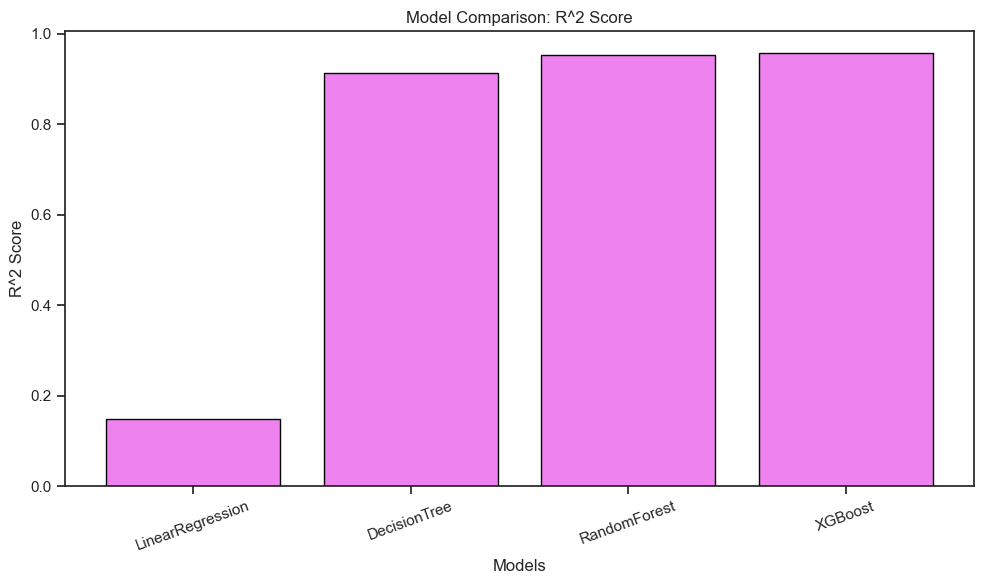

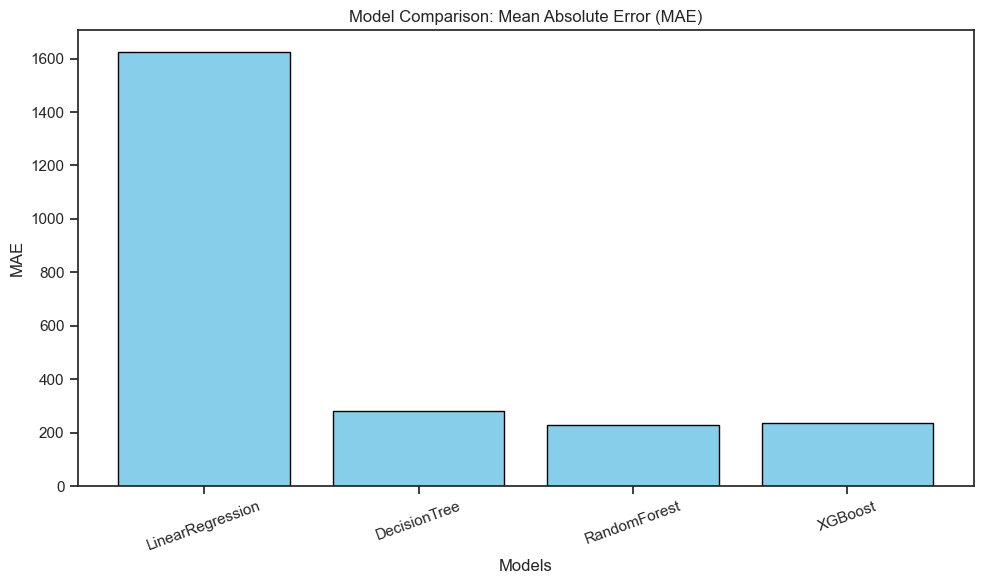

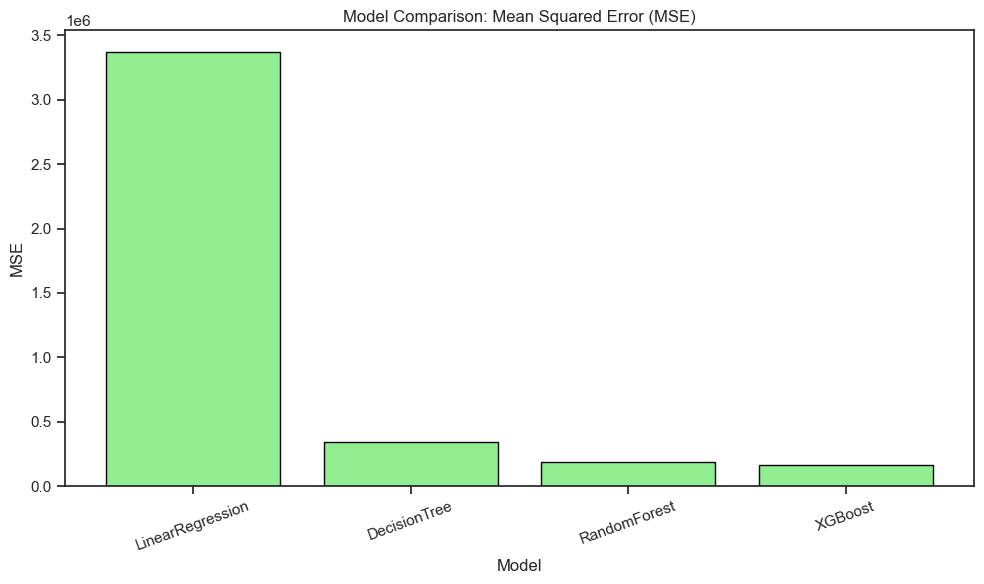

In [133]:
# Extract model names and scores/metrics
model_names = list(model_scores.keys())
r2_scores = [metrics["R^2"] for metrics in model_metrics.values()]
mae_scores = [metrics["MAE"] for metrics in model_metrics.values()]
mse_scores = [metrics["MSE"] for metrics in model_metrics.values()]

# Create a bar plot for R^2 scores
plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_scores, color="violet", edgecolor="black")
plt.xlabel("Models")
plt.ylabel("R^2 Score")
plt.title("Model Comparison: R^2 Score")
plt.xticks(rotation=20)
plt.tight_layout()

# Create a bar plot for MAE scores
plt.figure(figsize=(10, 6))
plt.bar(model_names, mae_scores, color="skyblue", edgecolor="black")
plt.xlabel("Models")
plt.ylabel("MAE")
plt.title("Model Comparison: Mean Absolute Error (MAE)")
plt.xticks(rotation=20)
plt.tight_layout()

# Create a bar plot for MSE scores
plt.figure(figsize=(10, 6))
plt.bar(model_names, mse_scores, color="lightgreen", edgecolor="black")
plt.xlabel("Model")
plt.ylabel("MSE")
plt.title("Model Comparison: Mean Squared Error (MSE)")
plt.xticks(rotation=20)
plt.tight_layout()

> Based on the results, the XGBoost regression model performed the best among the four models, followed by RandomForest Regression model.
The reason why XGBoost performed the best among the four could be due to it's ability to capture complex relationships in data, reduce overfitting and produce accurate predictions. 

# Model Deployment

We want to save our XGBoost model for future use. 

In [53]:
xgb_model = models["XGBoost"]

# Save the trained model 
joblib.dump(xgb_model, "xgboost_model.pkl")

['xgboost_model.pkl']

# Load and Use Model for Predictions

In [54]:
# Load the saved model 
loaded_model = joblib.load("xgboost_model.pkl")

# Use the model for predictions 
# We are going to use the first 10 rows of the testing data 
sample_data = X_test.iloc[:10]
prediction = loaded_model.predict(sample_data)

# Print the predictions 
print(prediction)

[5827.245   2312.0002   694.57556 1829.1882  4903.835   4426.0854
 5805.964   5578.7344  4808.552   4163.504  ]


# What's next? 

* Deploy the machine learning model trained using Amazon SageMaker and use AWS Lambda to create a serverless API endpoint that accepts real-time traffic data as an input and returns predictions for future traffic volumes. Using Amazon CloudWatch we could monitor the API performance and usage metrics. 

* Create an interactive dashboard using Amazon QuickSight to visualize historical traffic data and forecasted traffic volumes, employ Amazon SageMaker for training predictive models, regularly refreshing forecasts and set up CloudWatch alarms to alert administrators of natable deviations between forecasted and observed traffic volumes. 